In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn

In [3]:
df_users = pd.read_csv("users.csv")
df_repos = pd.read_csv("repos.csv")
df_ratings = pd.read_csv("ratings.csv")

In [4]:
df_users.head()

,userId,username,name
0,1,iris9112,Isabel Ruiz Buriticá
1,2,dianaclarke,Diana
2,3,nateprewitt,Nate Prewitt
3,4,oldani,Ordanis Sanchez
4,5,waflessnet,waflessnet


In [5]:
df_repos.head()

,repoId,title,categories,stars
0,1,airbnb / javascript,completar,NaN
1,2,kamranahmedse / developer-roadmap,Roadmap to becoming a web developer in 2019,85800.0
2,3,microsoft / vscode,Visual Studio Code,80855.0
3,4,torvalds / linux,Linux kernel source tree,78761.0
4,5,ytdl-org / youtube-dl,Command-line program to download videos from Y...,53909.0


In [6]:
df_ratings.head()

,userId,repoId,rating
0,1,1,2
1,1,2,3
2,1,3,4
3,1,4,5
4,1,5,3


In [7]:
n_users = df_ratings.userId.unique().shape[0]
n_items = df_ratings.repoId.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

30 users
167 items


(array([94., 62., 66., 28., 40., 12., 14.,  8.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

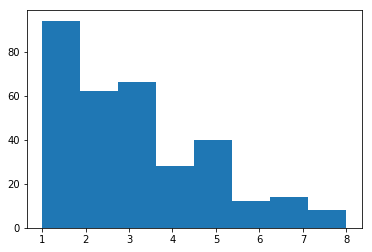

In [8]:
plt.hist(df_ratings.rating,bins=8)

In [9]:
df_ratings.groupby(["rating"])["userId"].count()

rating
1    94
2    62
3    66
4    28
5    40
6    12
7    14
8     8
Name: userId, dtype: int64

(array([94., 31., 22.,  7.,  8.,  2.,  2.,  1.]),
 array([1.   , 1.875, 2.75 , 3.625, 4.5  , 5.375, 6.25 , 7.125, 8.   ]),
 <a list of 8 Patch objects>)

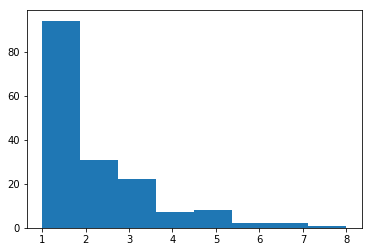

In [10]:
plt.hist(df_ratings.groupby(["repoId"])["repoId"].count(),bins=8)

# Método 1: User-Based

In [11]:
df_matrix = pd.pivot_table(df_ratings, values='rating', index='userId', columns='repoId').fillna(0)
df_matrix

repoId,1,2,3,4,5,6,7,8,9,10,...,158,159,160,161,162,163,164,165,166,167
userId,,,,,,,,,,,,,,,,,,,,,
1,2.0,3.0,4.0,5.0,3.0,1.0,5.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
ratings = df_matrix.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 6.43%


In [13]:
ratings_train, ratings_test = train_test_split(ratings, test_size = 0.2, shuffle=False, random_state=42)

In [14]:
ratings_train.shape

(24, 167)

In [15]:
ratings_test.shape

(6, 167)

<ul>
<li>Matriz de similitud entre los usuarios (distancia del coseno -vectores-).</li>
<li>Predecir la valoración desconocida de un ítem i para un usuario activo u basandonos en la suma ponderada de todas las valoraciones del resto de usuarios para dicho ítem.</li>
<li>Recomendaremos los nuevos ítems a los usuarios según lo establecido en los pasos anteriores.</li>
</ul>

In [16]:
sim_matrix = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)

In [17]:
sim_matrix.shape

(30, 30)

In [18]:
# sim_matrix

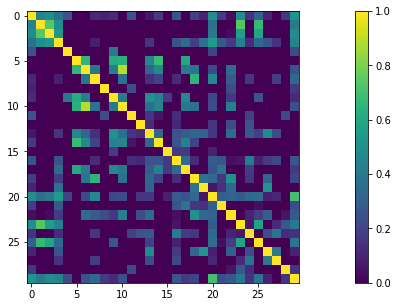

In [19]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(sim_matrix);
plt.colorbar()
plt.show()

In [20]:
#separar las filas y columnas de train y test
sim_matrix_train = sim_matrix[0:24,0:24]
sim_matrix_test = sim_matrix[24:30,24:30]
print(sim_matrix_train.shape)
print(sim_matrix_test.shape)

(24, 24)
(6, 6)


## Predicciones (las recomendaciones!)

In [21]:
users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T

In [22]:
users_predictions.shape

(24, 167)

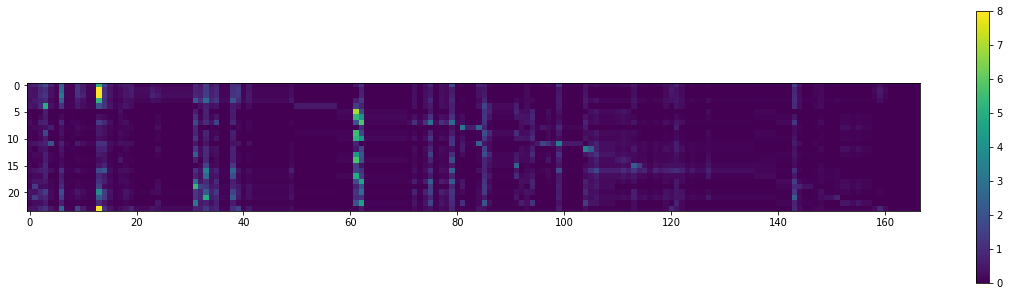

In [23]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(users_predictions);
plt.colorbar()
plt.show()

### Veamos un ejemplo

In [24]:
USUARIO_EJEMPLO = 'jbagnato' # debe existir en nuestro dataset de train!
data = df_users[df_users['username'] == USUARIO_EJEMPLO]
usuario_ver = data.iloc[0]['userId'] -1 # resta 1 para obtener el index de pandas
user0=users_predictions.argsort()[usuario_ver]

# Veamos los tres recomendados con mayor puntaje en la predic para este usuario
for i, aRepo in enumerate(user0[-3:]):
    selRepo = df_repos[df_repos['repoId']==(aRepo+1)]
    print(selRepo['title'] , 'puntaje:', users_predictions[usuario_ver][aRepo])

4    ytdl-org / youtube-dl
Name: title, dtype: object puntaje: 2.061791042203265
84    dipanjanS / practical-machine-learning-with-py...
Name: title, dtype: object puntaje: 2.4496166855518746
99    abhat222 / Data-Science--Cheat-Sheet
Name: title, dtype: object puntaje: 3.362878201910944


## Medir el Error

In [25]:
def get_mse(preds, actuals):
    if preds.shape[1] != actuals.shape[1]:
        actuals = actuals.T
    preds = preds[actuals.nonzero()].flatten()
    actuals = actuals[actuals.nonzero()].flatten()
    return mean_squared_error(preds, actuals)


In [26]:
get_mse(users_predictions, ratings_train)

3.3906497514974663

In [27]:
# Realizo las predicciones para el test set
users_predictions_test = sim_matrix.dot(ratings) / np.array([np.abs(sim_matrix).sum(axis=1)]).T
users_predictions_test = users_predictions_test[24:30,:]

get_mse(users_predictions_test, ratings_test)

4.722040854666231